## Assignment : Linear Regression
### -- Adarsh V Shetty

`Problem Statement:` A Chinese automobile company `Geely Auto` aspires to enter the US market, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know the following:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

## Step 1: Reading and Understanding the Data



In [742]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [743]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [744]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [745]:
# For our Analysis, we only need the name of the company, let us extract the company name from carname and delete carName
df['company'] = df['CarName'].str.split(" ", n = 1, expand = True)[0].str.lower()
df.drop(['CarName'], axis = 1, inplace = True)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [746]:
print(df.shape)


(205, 26)


In [747]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

- We do not have null values, hence cleaning or imputing null/Na values is not required

In [748]:
df.company.value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
maxda           2
renault         2
vw              2
porcshce        1
vokswagen       1
mercury         1
toyouta         1
Name: company, dtype: int64

In [749]:
# There are few spelling errors in the Comapny Names, let us correct them
replace_values={ 'porcshce' : 'porsche', 'toyouta' : 'toyota', 'vokswagen' : 'volkswagen', 'vw' : 'volkswagen', 'maxda':'mazda' }
df.company.value_counts()
df = df.replace({"company": replace_values})
df.company.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: company, dtype: int64

In [750]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- Looks like there is no significant outliers when we see the values of independent variables

## Step 2: Visualising the Data

In [751]:
#Let us try and visualize the numerical variables using Pair Plot
## Plotting large size figure as the number of data is more
#plt.figure(figsize=(20,30))
#sns.pairplot(df)
#plt.show()

#### Observations:
- Looking at the scatter plot of the numerical variables of the data set, following are few observations
     - Looks like Price has some `positive correlation` going on with variables such as 'wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize','boreratio','horsepower'
     - Looks like Price has some `negative correlation` going on with variables such as 'citympg' and 'higwaympg'

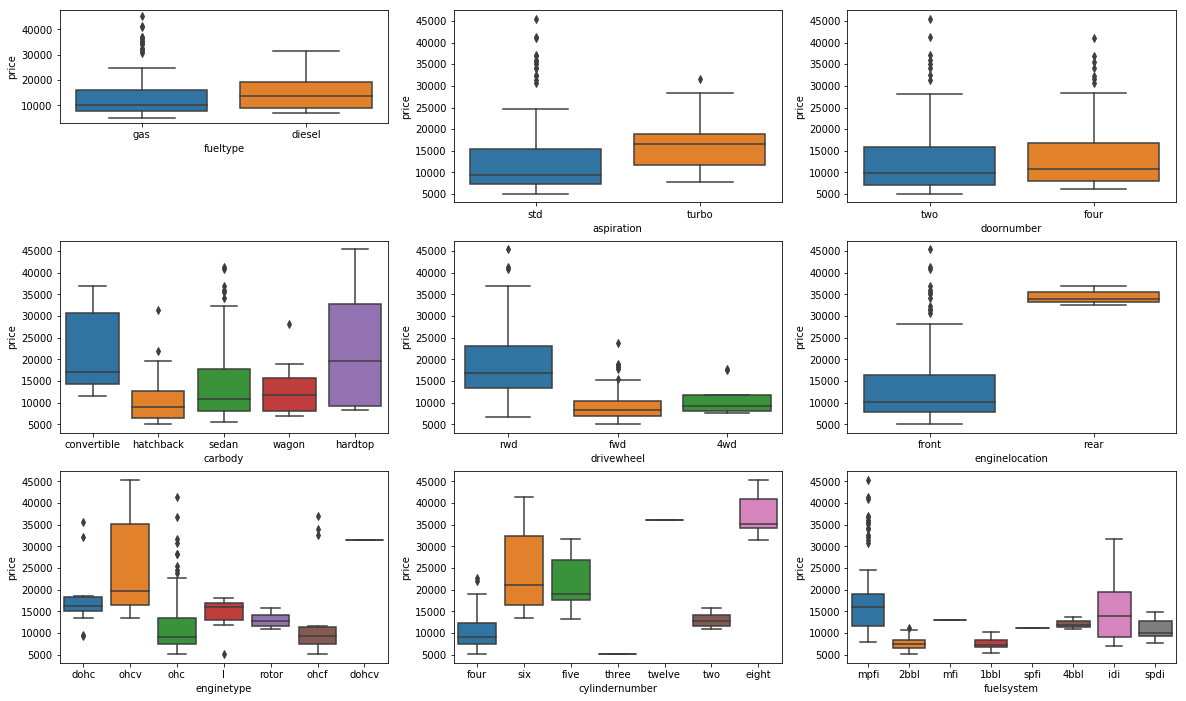

In [752]:
## Visualizing Categorical Variables

plt.figure(figsize=(20, 12))
plt.subplot(5,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

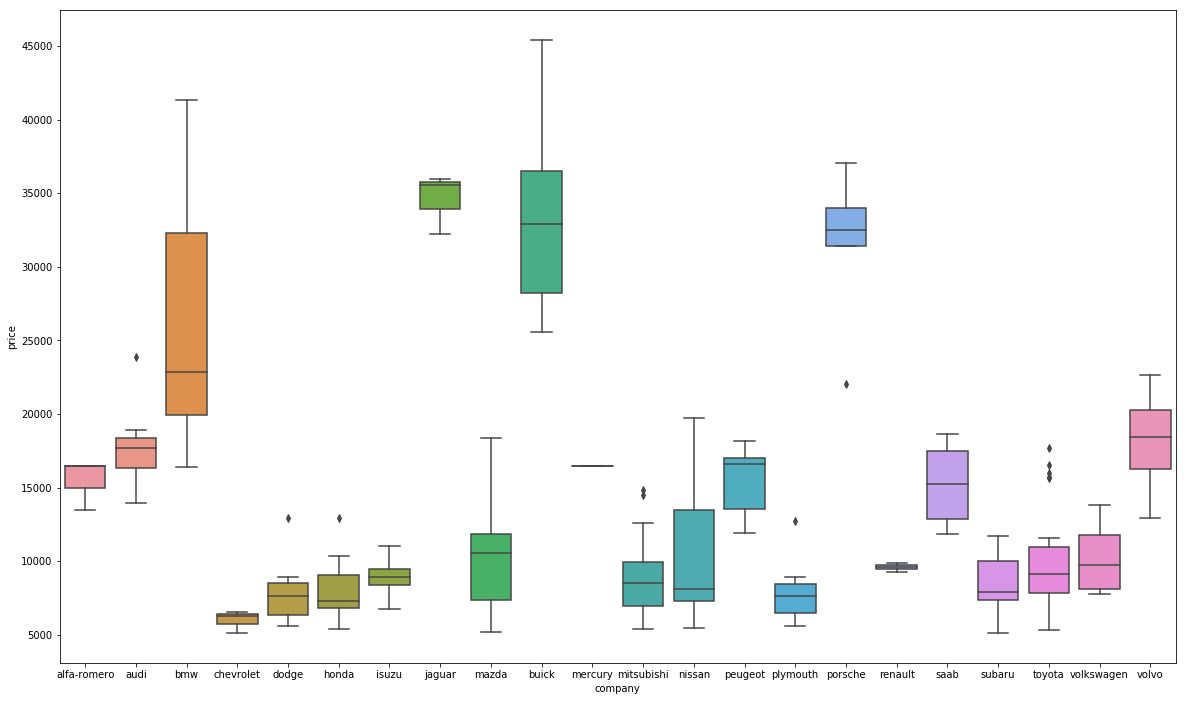

In [753]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'company', y = 'price', data = df)
plt.show()

#### Observations :
- `Fueltype` : Diesel cars ar slighlty higher priced.
- `aspiration` : turbo cars are higher priced than std.
- `doornumber` : Both 2 and 4 doors variant seem to have similar pricing.
- `carbody` : convertible and hardtop cars are higher priced than other variants.
- `drivewheel` : 'rwd' category drivewheel cars are highly  priced.
- `enginelocation` : front mounted engine cars are priced less than rear mounted engines, rear mounted engines are common in sports cars and hence the price.
- `enginetype` : ohcv type have high price range than others.
- `cylindernumber` : six cylinder engines and 8 cylinder engine cars are on a higher price range.
- `fuelsystem` : idi and mpfi type fuel system are on higher price range.
- `company` : - BMW,jaguar,buick,porche manufactures expensive cars

- Looking at the box plots , we can infer that there are few outliers at higher price
- Let us check the distribution of `price`

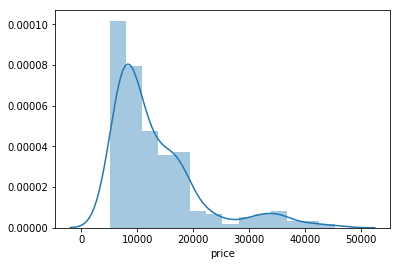

In [754]:
sns.distplot(df.price)
plt.show()

In [755]:
df.price.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
10%       6657.000000
20%       7385.800000
30%       8022.000000
40%       9036.600000
50%      10295.000000
60%      12515.600000
70%      15458.000000
80%      17493.800000
90%      22563.000000
95%      32472.400000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

- Looks like 90 % of the cars are under `USD 22563`
- Let us filter the data set to include only 90% of the car prices

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [757]:
df = df.loc[(df.price <= 22563) , :]


## Step 3: Preparing the Data

#### Understanding/encoding from the above table

- `Fueltype_gas`:
    - 0 - diesel
    - 1 - gas
- `aspiration_turbo`:
    - 0 - std
    - 1- turbo
- `doornumber_two`:
    - 0 - 4 doors
    - 1 - 2 doors
- `enginelocation_rear`:
    - 0 - front mounted engine
    - 1 - rear mounted engine
- `drivewheel_fwd/drivewheel_rwd`
    - 00 - 4wd
    - 01 - rwd
    - 10 - fwd


In [758]:
#ohe = OneHotEncoder(categories='auto')
#feature_arr = ohe.fit_transform(df[['fueltype','aspiration','doornumber','enginelocation','drivewheel','carbody','enginetype','cylindernumber','fuelsystem']]).toarray()
#features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names())
#features.info()


def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df = dummies('fueltype',df)
df = dummies('aspiration',df)
df = dummies('carbody',df)
df = dummies('drivewheel',df)
df = dummies('enginetype',df)
df = dummies('cylindernumber',df)
df = dummies('doornumber',df)
df = dummies('fuelsystem',df)
df = dummies('enginelocation',df)

In [759]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,three,two,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,106.532609,0.869565,97.975000,172.252174,65.503261,53.675543,2452.407609,116.923913,3.297391,3.245000,...,0.005435,0.021739,0.440217,0.358696,0.016304,0.086957,0.005435,0.418478,0.048913,0.005435
std,59.465001,1.225569,5.071804,11.117195,1.700784,2.413690,422.622960,25.674394,0.260807,0.304565,...,0.073721,0.146228,0.497768,0.480926,0.126989,0.282540,0.073721,0.494655,0.216275,0.073721
min,1.000000,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.750000,0.000000,94.500000,166.300000,64.000000,52.000000,2121.500000,97.000000,3.072500,3.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,108.500000,1.000000,96.500000,172.400000,65.400000,54.100000,2385.000000,110.000000,3.270000,3.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,158.250000,2.000000,100.400000,177.800000,66.500000,55.500000,2785.500000,134.000000,3.510000,3.410000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,204.000000,3.000000,114.200000,198.900000,71.400000,59.800000,3485.000000,181.000000,3.940000,3.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [760]:
#df.info()

## Step 4: Splitting the Data into Training and Testing Sets

In [761]:
# we do not need company name and car ID for our price analysis
df.drop(['company','car_ID'],axis = 1, inplace = True)

In [762]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 203
Data columns (total 40 columns):
symboling           184 non-null int64
wheelbase           184 non-null float64
carlength           184 non-null float64
carwidth            184 non-null float64
carheight           184 non-null float64
curbweight          184 non-null int64
enginesize          184 non-null int64
boreratio           184 non-null float64
stroke              184 non-null float64
compressionratio    184 non-null float64
horsepower          184 non-null int64
peakrpm             184 non-null int64
citympg             184 non-null int64
highwaympg          184 non-null int64
price               184 non-null float64
gas                 184 non-null uint8
turbo               184 non-null uint8
hardtop             184 non-null uint8
hatchback           184 non-null uint8
sedan               184 non-null uint8
wagon               184 non-null uint8
fwd                 184 non-null uint8
rwd                 1

In [763]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7,test_size = 0.3, random_state = 100)
#print(df_train.info())
#print(df_test.describe())

In [764]:
scaler = MinMaxScaler()
columns = df_train.columns
df_train[columns] = scaler.fit_transform(df_train[columns])

In [765]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,two,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,0.562500,0.410581,0.538535,0.463964,0.447940,0.481445,0.454232,0.534208,0.640540,0.170518,...,0.007812,0.406250,0.406250,0.390625,0.023438,0.070312,0.007812,0.398438,0.062500,0.0
std,0.245591,0.178736,0.187692,0.148757,0.225217,0.208693,0.212158,0.185024,0.169867,0.214872,...,0.088388,0.493062,0.493062,0.489808,0.151883,0.256678,0.088388,0.491500,0.243013,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.400000,0.286232,0.435986,0.333333,0.281818,0.324987,0.300000,0.364286,0.550546,0.098437,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.600000,0.358696,0.541522,0.459459,0.481818,0.451678,0.404167,0.521429,0.655738,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.800000,0.483696,0.634948,0.558559,0.609091,0.641087,0.575000,0.669643,0.726776,0.150000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [766]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 105 to 9
Data columns (total 40 columns):
symboling           128 non-null float64
wheelbase           128 non-null float64
carlength           128 non-null float64
carwidth            128 non-null float64
carheight           128 non-null float64
curbweight          128 non-null float64
enginesize          128 non-null float64
boreratio           128 non-null float64
stroke              128 non-null float64
compressionratio    128 non-null float64
horsepower          128 non-null float64
peakrpm             128 non-null float64
citympg             128 non-null float64
highwaympg          128 non-null float64
price               128 non-null float64
gas                 128 non-null float64
turbo               128 non-null float64
hardtop             128 non-null float64
hatchback           128 non-null float64
sedan               128 non-null float64
wagon               128 non-null float64
fwd                 128 non-null f

In [767]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,two,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,0.562500,0.410581,0.538535,0.463964,0.447940,0.481445,0.454232,0.534208,0.640540,0.170518,...,0.007812,0.406250,0.406250,0.390625,0.023438,0.070312,0.007812,0.398438,0.062500,0.0
std,0.245591,0.178736,0.187692,0.148757,0.225217,0.208693,0.212158,0.185024,0.169867,0.214872,...,0.088388,0.493062,0.493062,0.489808,0.151883,0.256678,0.088388,0.491500,0.243013,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.400000,0.286232,0.435986,0.333333,0.281818,0.324987,0.300000,0.364286,0.550546,0.098437,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.600000,0.358696,0.541522,0.459459,0.481818,0.451678,0.404167,0.521429,0.655738,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.800000,0.483696,0.634948,0.558559,0.609091,0.641087,0.575000,0.669643,0.726776,0.150000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


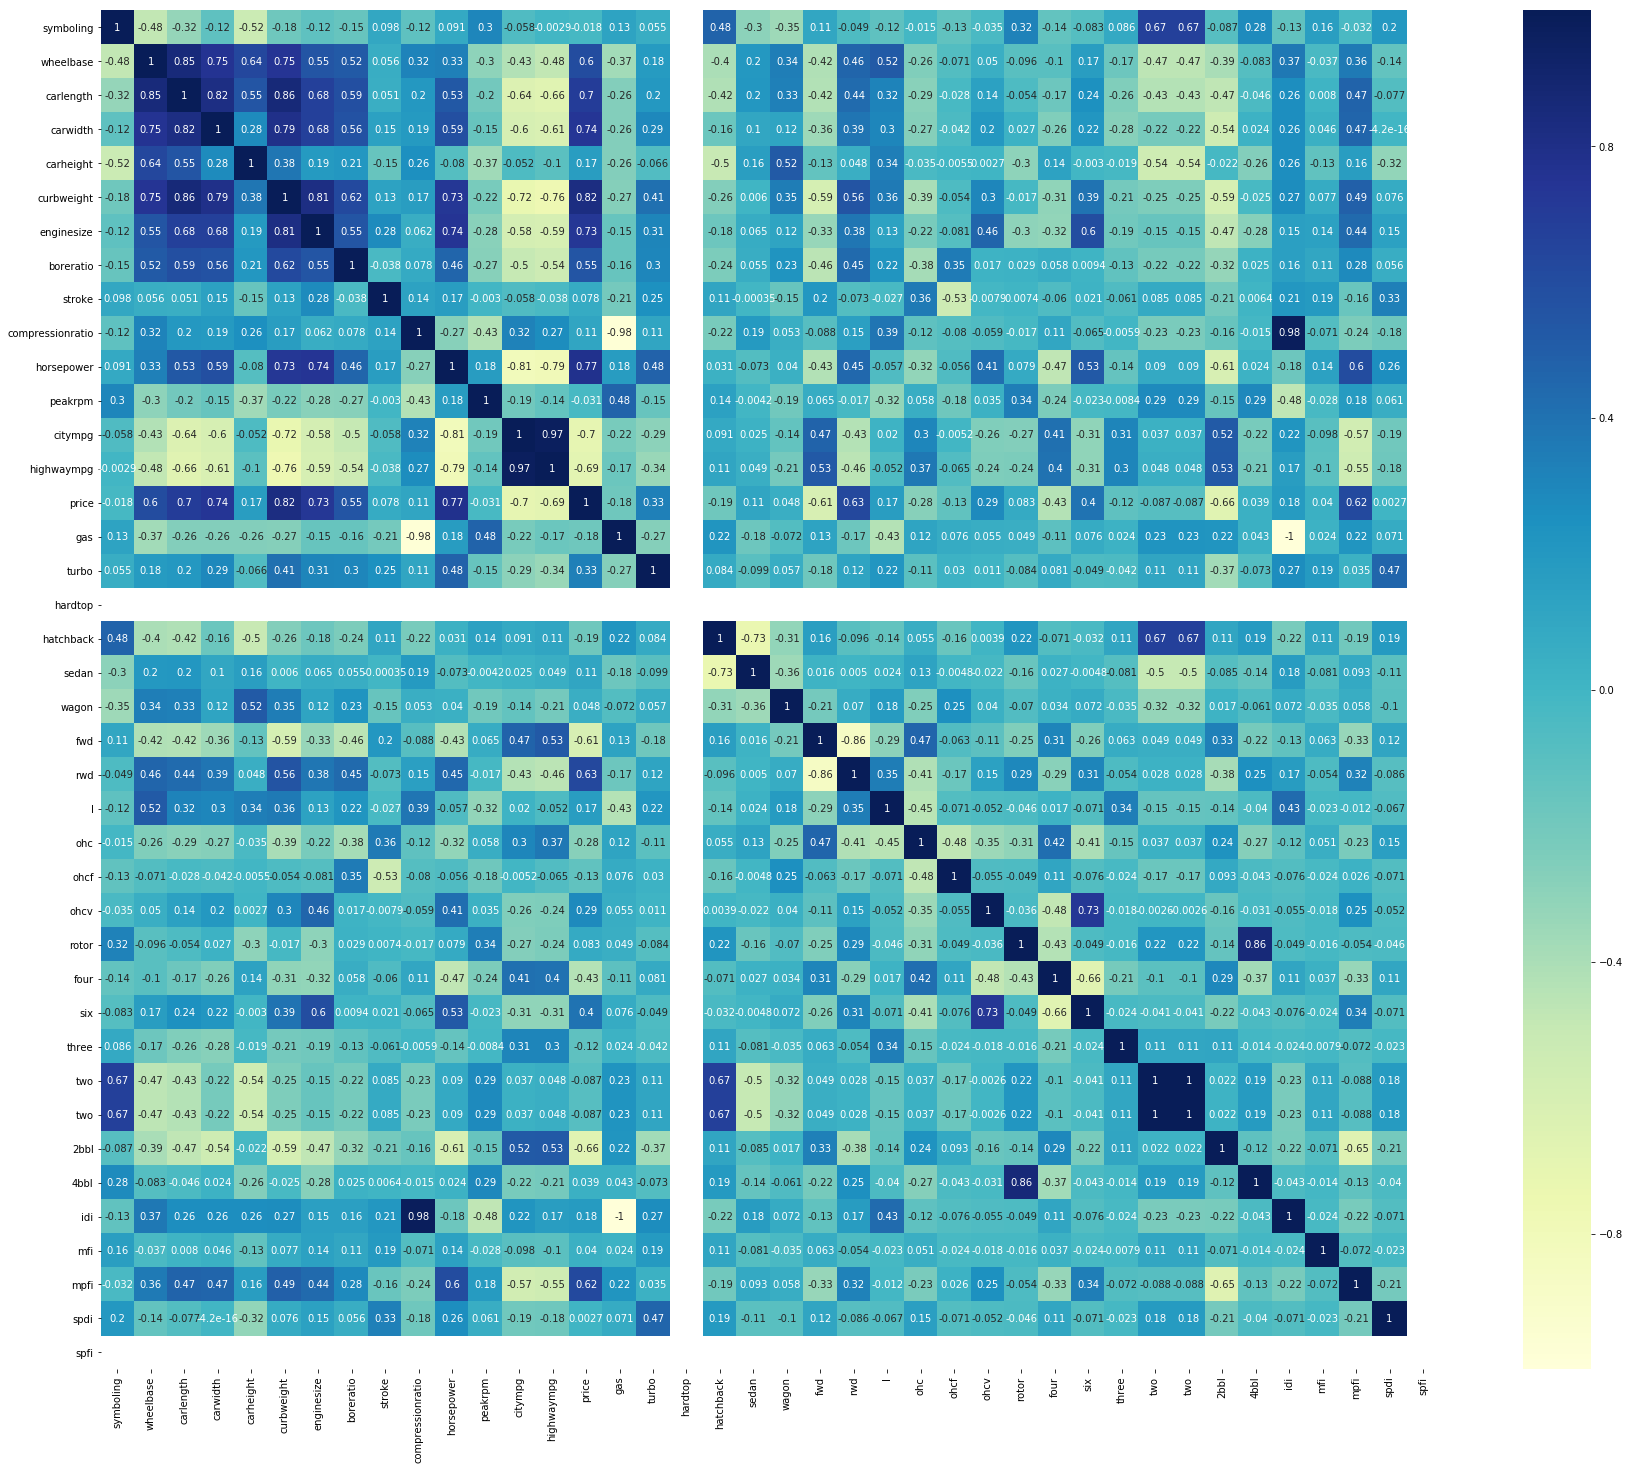

In [768]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Looking at the correlation heat map of all variables of the data set, following are few observations
     - Looks like Price has some `positive correlation` going on with variables such as 'wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize','boreratio','horsepower'
     - Looks like Price has some `negative correlation` going on with variables such as 'citympg' , 'higwaympg','drive wheel- fwd','4 cylinder' and 'fuel system type :2bbl'             
     - Strong `positive correlation` among the variables wheelbase ,carlength ,carwidth,curbweight,enginesize and boreratio 
     

- for the column `fs_4bbl`, looks like most of the data is '0', let us check the distribution of the column `fs_4bbl`

In [769]:
#df_train.fs_4bbl.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99,1])

- Upto 97% of data is 0 for fs_4bbl(fuel system = 4bbl), let us delete this column as 97% of the cars in the data set do not have this data

In [770]:
#df_train.drop(['fs_4bbl'],axis = 1, inplace = True)

## Step 5: Building a linear model :RFE

In [771]:
# Dividing into X and Y set
y_train = df_train.pop('price')
X_train = df_train

In [772]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [773]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 9),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', False, 12),
 ('boreratio', False, 6),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 24),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('gas', False, 16),
 ('turbo', False, 21),
 ('hardtop', False, 29),
 ('hatchback', False, 3),
 ('sedan', False, 4),
 ('wagon', False, 2),
 ('fwd', False, 8),
 ('rwd', False, 25),
 ('l', False, 22),
 ('ohc', False, 5),
 ('ohcf', False, 28),
 ('ohcv', False, 23),
 ('rotor', False, 14),
 ('four', False, 7),
 ('six', False, 20),
 ('three', True, 1),
 ('two', False, 27),
 ('two', False, 26),
 ('2bbl', False, 13),
 ('4bbl', False, 15),
 ('idi', False, 19),
 ('mfi', False, 11),
 ('mpfi', False, 17),
 ('spdi', False, 10),
 ('spfi', False, 30)]

In [774]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'stroke',
       'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'three'],
      dtype='object')

In [775]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_lm_1 = sm.add_constant(X_train_rfe)
# fitting a linear model
lm = sm.OLS(y_train,X_train_lm_1).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     52.48
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.49e-38
Time:                        20:30:13   Log-Likelihood:                 104.58
No. Observations:                 128   AIC:                            -187.2
Df Residuals:                     117   BIC:                            -155.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0212      0.086  

In [776]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,citympg,68.16
8,highwaympg,66.21
1,carlength,61.21
3,curbweight,56.16
2,carwidth,42.01
0,wheelbase,30.50
6,horsepower,17.00
4,stroke,14.82
5,compressionratio,2.90
9,three,1.22


In [777]:
X_train_rfe = X_train_rfe.drop(["carlength"], axis = 1)
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_rfe)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     57.13
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           7.48e-39
Time:                        20:30:13   Log-Likelihood:                 103.06
No. Observations:                 128   AIC:                            -186.1
Df Residuals:                     118   BIC:                            -157.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0289      0.081  

In [778]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,citympg,67.56
7,highwaympg,64.96
2,curbweight,45.20
1,carwidth,37.63
0,wheelbase,23.62
5,horsepower,16.92
3,stroke,14.82
4,compressionratio,2.83
8,three,1.21


- `engine size` has `VIF > 5`, Let us drop engine size and build the model again

In [779]:
X_train_rfe = X_train_rfe.drop(["curbweight"], axis = 1)
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_rfe)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     63.66
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           2.11e-39
Time:                        20:30:14   Log-Likelihood:                 102.13
No. Observations:                 128   AIC:                            -186.3
Df Residuals:                     119   BIC:                            -160.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0046      0.077  

In [780]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,citympg,66.56
6,highwaympg,62.69
1,carwidth,35.71
0,wheelbase,17.17
2,stroke,14.64
4,horsepower,10.87
3,compressionratio,2.45
7,three,1.21


In [781]:
X_train_rfe = X_train_rfe.drop(["three"], axis = 1)
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_rfe)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     71.17
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.02e-39
Time:                        20:30:14   Log-Likelihood:                 100.56
No. Observations:                 128   AIC:                            -185.1
Df Residuals:                     120   BIC:                            -162.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0084      0.078  

In [782]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,citympg,66.28
6,highwaympg,62.56
1,carwidth,33.86
0,wheelbase,16.96
2,stroke,14.46
4,horsepower,10.28
3,compressionratio,2.45


In [783]:
X_train_rfe = X_train_rfe.drop(["carwidth"], axis = 1)
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_rfe)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     81.64
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           3.59e-40
Time:                        20:30:14   Log-Likelihood:                 99.262
No. Observations:                 128   AIC:                            -184.5
Df Residuals:                     121   BIC:                            -164.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0332      0.073  

In [784]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,citympg,66.01
5,highwaympg,61.64
1,stroke,13.89
0,wheelbase,7.85
3,horsepower,7.14
2,compressionratio,2.40


In [785]:
X_train_rfe = X_train_rfe.drop(["citympg"], axis = 1)
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_rfe)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     87.99
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           8.88e-39
Time:                        20:30:15   Log-Likelihood:                 93.392
No. Observations:                 128   AIC:                            -174.8
Df Residuals:                     122   BIC:                            -157.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0279      0.074  

In [786]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,stroke,13.88
0,wheelbase,7.50
3,horsepower,7.09
4,highwaympg,4.58
2,compressionratio,2.36


In [787]:
X_train_rfe = X_train_rfe.drop(["highwaympg"], axis = 1)
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_rfe)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     110.3
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.02e-39
Time:                        20:30:16   Log-Likelihood:                 93.121
No. Observations:                 128   AIC:                            -176.2
Df Residuals:                     123   BIC:                            -162.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0691      0.047  

In [788]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,7.50
1,stroke,6.11
3,horsepower,5.16
2,compressionratio,2.31


In [789]:
X_train_rfe = X_train_rfe.drop(["wheelbase"], axis = 1)
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_rfe)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           6.34e-35
Time:                        20:30:24   Log-Likelihood:                 79.026
No. Observations:                 128   AIC:                            -150.1
Df Residuals:                     124   BIC:                            -138.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0359      0.048  

In [790]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,stroke,5.14
2,horsepower,3.74
1,compressionratio,1.80


In [791]:
X_train_rfe = X_train_rfe.drop(["stroke"], axis = 1)
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_rfe)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     155.5
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.21e-34
Time:                        20:31:23   Log-Likelihood:                 75.612
No. Observations:                 128   AIC:                            -145.2
Df Residuals:                     125   BIC:                            -136.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0674      0.027  

In [792]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,compressionratio,1.21
1,horsepower,1.21


## Step 6: Residual Analysis of the train data

In [793]:
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

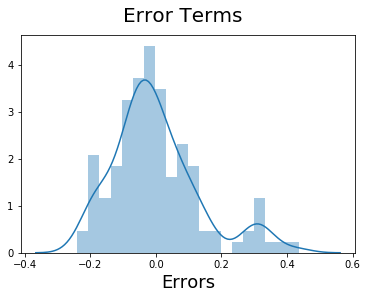

In [794]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

- The error term is normally distributed with the mean at 0

## Step 7: Making Predictions Using the Final Model

In [795]:

df_test[columns] = scaler.transform(df_test[columns])

In [796]:
y_test = df_test.pop('price')
X_test = df_test

In [797]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['horsepower','compressionratio']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [798]:
# Making predictions using the fourth model
y_test_pred = lm.predict(X_test_new)

## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

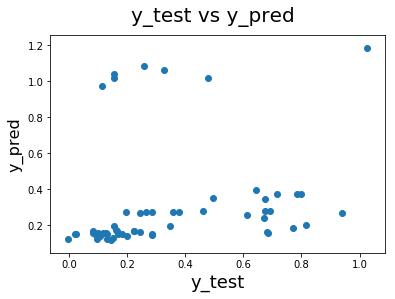

In [802]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [803]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

-0.7493381736602962